In [3]:
%pip install scipy --upgrade
import math
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy import optimize as opt
import numpy as np

# **Demo pdf & cdf of Binomial(n,p)**

In [4]:
n=50
p=0.02
x=np.array(range(0,6,1))

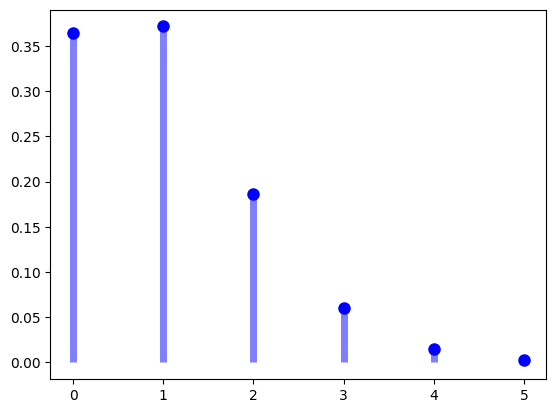

In [5]:
plt.plot(x, stats.binom.pmf(x, n, p), 'bo', ms=8, label='binom pmf')
plt.vlines(x, 0, stats.binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)

In [6]:
1-stats.binom.cdf(2,n=50,p=0.02)

0.078427748350969

In [7]:
stats.binom.cdf(2,n=50,p=0.02)

0.921572251649031

In [8]:
stats.binom.ppf(0.98,n=50,p=0.02)

3.0

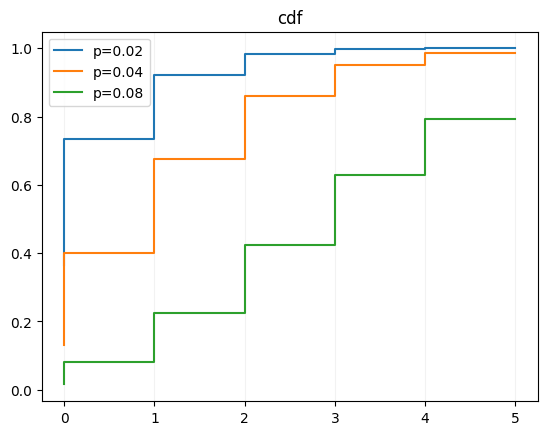

In [9]:
n=50
p1=0.02
p2=0.04
p3=0.08
plt.step(x, stats.binom.cdf(x, n, p1),label='p=0.02')
plt.step(x, stats.binom.cdf(x, n, p2),label='p=0.04')
plt.step(x, stats.binom.cdf(x, n, p3),label='p=0.08')
plt.grid(axis='x', color='0.95')
plt.legend(title='')
plt.title('cdf')
plt.show()

In [10]:
stats.binom.rvs(n,p3,size=100)

array([3, 8, 5, 1, 4, 3, 5, 3, 6, 4, 4, 4, 1, 2, 1, 4, 5, 5, 5, 4, 3, 3,
       2, 5, 3, 3, 6, 3, 5, 1, 1, 5, 0, 9, 6, 7, 3, 5, 5, 5, 3, 2, 3, 3,
       3, 8, 5, 5, 2, 2, 5, 3, 3, 3, 2, 2, 3, 6, 5, 4, 4, 3, 1, 8, 2, 5,
       4, 6, 5, 4, 2, 3, 5, 6, 6, 2, 5, 2, 3, 4, 3, 2, 4, 5, 2, 2, 4, 6,
       6, 1, 5, 6, 5, 6, 3, 3, 5, 5, 8, 5])

In [11]:
stats.binom.ppf(0.98,n=8,p=0.02)

1.0

In [12]:
stats.binom.ppf(0.98,n=8,p=0.04)

2.0

In [13]:
stats.binom.ppf(0.8,n=8,p=0.04)

1.0

# **IC Module Analysis**

In [14]:
preg=0.7
pbadreg=0.1
pgoodreg=1-pbadreg
#
pirreg=1-preg
pbadirreg=0.4
pgoodirreg=1-pbadirreg

In [15]:
def ICModuleSim(n=10):
  ICs=np.empty(n,dtype='U9')
  #1 denotes regular
  #-1 denotes irregular
  labels=np.random.choice([1,-1],n,replace=True,p=[preg,pirreg])
  if np.any(labels==1):
    regid=np.where(labels==1)
    n1=len(labels[regid])
    ICs[regid]=np.random.choice(["goodreg","badreg"],n1,
             replace=True,p=[pgoodreg,pbadreg])
  ##
  if np.any(labels==-1):
    irregid=np.where(labels==-1)
    n2=len(labels[irregid])
    ICs[irregid]=np.random.choice(["goodirreg","badirreg"],n2,
             replace=True,p=[pgoodirreg,pbadirreg])
  return ICs

In [16]:
ICModuleSim(10)


array(['goodreg', 'goodirreg', 'badirreg', 'goodreg', 'goodreg',
       'goodreg', 'goodreg', 'goodirreg', 'goodreg', 'goodreg'],
      dtype='<U9')

In [17]:
S=10000
SimICs=np.empty([S,10],dtype='U9')
for s in range(S):
  SimICs[s,]=ICModuleSim(10)

In [18]:
SimICs[range(0,5),]

array([['goodreg', 'goodreg', 'goodreg', 'badreg', 'goodreg',
        'goodirreg', 'goodreg', 'goodreg', 'goodirreg', 'goodreg'],
       ['goodreg', 'goodreg', 'badirreg', 'goodirreg', 'goodreg',
        'badreg', 'goodreg', 'badirreg', 'goodreg', 'goodreg'],
       ['goodreg', 'goodreg', 'goodirreg', 'badirreg', 'goodreg',
        'goodreg', 'goodreg', 'goodreg', 'goodreg', 'goodreg'],
       ['goodreg', 'goodirreg', 'goodreg', 'goodreg', 'goodreg',
        'goodirreg', 'goodreg', 'goodirreg', 'goodreg', 'goodreg'],
       ['goodreg', 'goodreg', 'goodreg', 'goodreg', 'goodirreg',
        'goodreg', 'goodreg', 'goodreg', 'goodirreg', 'goodreg']],
      dtype='<U9')

In [19]:
badnum=np.empty(S)
badnumreg=np.empty(S)
badnumirreg=np.empty(S)
numreg=np.empty(S)
numirreg=np.empty(S)

In [20]:
for s in range(S):
  badnumreg[s]=np.sum(SimICs[s,]=="badreg")
  badnumirreg[s]=np.sum(SimICs[s,]=="badirreg")
  badnum[s]=badnumreg[s]+badnumirreg[s]
  #
  numreg[s]=np.sum(SimICs[s,]=="badreg")+np.sum(SimICs[s,]=="goodreg")
  numirreg[s]=np.sum(SimICs[s,]=="badirreg")+np.sum(SimICs[s,]=="goodirreg")

In [21]:
np.sum(badnum==2)

3056

In [22]:
np.sum((badnum==2)&(numreg==10))

67

In [23]:
np.sum((badnum==2)&(numreg==10))/np.sum(badnum==2)

0.021924083769633507

In [24]:
k=1
np.sum(badnum==k)
np.sum((badnum==k)&(numirreg>=1))

2663

In [25]:
np.sum((badnum==k)&(numirreg>=1))/np.sum(badnum==k)

0.9620664739884393

# **Sourcing Problem with Decision Tree**

In [26]:
#Market Price
price=150
#Q:Capacity; c:Unit cost
#Supplier S
QS=5000
cS=120
#Supplier P
QP=10000
cP=100
#Fixed cost
fixcP=50000

In [27]:
#Simulate demand
np.random.seed(9527)
S=10000
Dweak=np.random.choice(range(2000,8001,1),S,replace=True)
Dstrong=np.random.choice(range(6000,14001,1),S,replace=True)

#Vectors for profits
Sprofitweak=np.empty(S)
Sprofitstrong=np.empty(S)
Pprofitweak=np.empty(S)
Pprofitstrong=np.empty(S)


In [28]:
for s in range(S):
  #Supplier S & weak market
  Sprofitweak[s]=-1*cS*QS+price*min(QS,Dweak[s])
  #Supplier S & strong market
  Sprofitstrong[s]=-1*cS*QS+price*min(QS,Dstrong[s])
  ##
  #Supllier P & weak market
  Pprofitweak[s]=-1*cP*QP-fixcP+price*min(QP,Dweak[s])
  #Supplier P & strong market
  Pprofitstrong[s]=-1*cP*QP-fixcP+price*min(QP,Dstrong[s])

In [30]:
stats.describe(Sprofitweak)

DescribeResult(nobs=10000, minmax=(-300000.0, 150000.0), mean=36635.34, variance=21451902895.87398, skewness=-0.9211068004636034, kurtosis=-0.6544694381653291)

In [31]:
stats.describe(Sprofitstrong)

<ipython-input-31-01d0bfa4a1ec>:1: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  stats.describe(Sprofitstrong)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1418: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  sk = skew(a, axis, bias=bias)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1419: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(a, axis, bias=bias)


DescribeResult(nobs=10000, minmax=(150000.0, 150000.0), mean=150000.0, variance=0.0, skewness=nan, kurtosis=nan)

In [32]:
stats.describe(Pprofitweak)

DescribeResult(nobs=10000, minmax=(-750000.0, 150000.0), mean=-300055.485, variance=68513485883.753136, skewness=-0.0016147307724453843, kurtosis=-1.2090209149162094)

In [33]:
stats.describe(Pprofitstrong)

DescribeResult(nobs=10000, minmax=(-149550.0, 450000.0), mean=298053.72, variance=37708129972.65885, skewness=-0.9056452656474865, kurtosis=-0.6748099257078297)

In [34]:
#Use E[Demand] for decision-making
print(-1*cS*QS+price*min(QS,5000))

print(-1*cS*QS+price*min(QS,10000))

print(-1*cP*QP-fixcP+price*min(QP,5000))

print(-1*cP*QP-fixcP+price*min(QP,10000))

150000
150000
-300000
450000


In [35]:
#Compute E[Profit] under S & Weak
temp=0
for d in range(2000,5001):
  temp=temp+1/(6001)*(-120*QS+150*d)

for d in range(5001,8001):
  temp=temp+1/(6001)*(-120*QS+150*QS)

temp

37481.253124478644

# **Geometric Distribution**

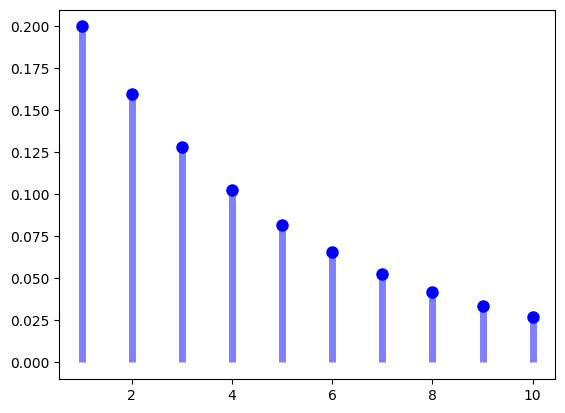

In [36]:
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.geom.html
p=0.2
xk=range(1,11)

plt.plot(xk, stats.geom.pmf(xk,p), 'bo', ms=8, label='geom pmf')
plt.vlines(xk, 0, stats.geom.pmf(xk,p), colors='b', lw=5, alpha=0.5)

In [37]:
stats.geom.pmf(6,0.2)

0.06553600000000002

In [38]:
stats.geom.cdf(6,0.2)

0.7378560000000001

In [39]:
1-stats.geom.cdf(6,0.2)

0.26214399999999993

In [40]:
stats.geom.ppf(0.95,0.2)

14.0

In [41]:
stats.geom.pmf(6,0.2)*stats.geom.pmf(7,0.2)

0.003435973836800003

# **Poisson Distribution**

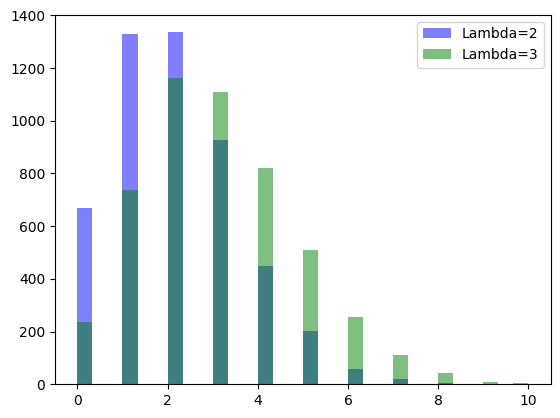

In [42]:
S=5000
lambda1=2
lambda2=3
pdata1=stats.poisson.rvs(lambda1,size=S)
pdata2=stats.poisson.rvs(lambda2,size=S)

plt.hist(pdata1,bins=30,alpha=0.5,label='Lambda=2',color='blue')
plt.hist(pdata2,bins=30,alpha=0.5,label='Lambda=3',color='green')
plt.legend(loc='upper right')
plt.show()

In [43]:
pdata=pdata1+pdata2
print(np.mean(pdata))
print(np.var(pdata))
np.ones_like(pdata)

5.033
5.089111


array([1, 1, 1, ..., 1, 1, 1])

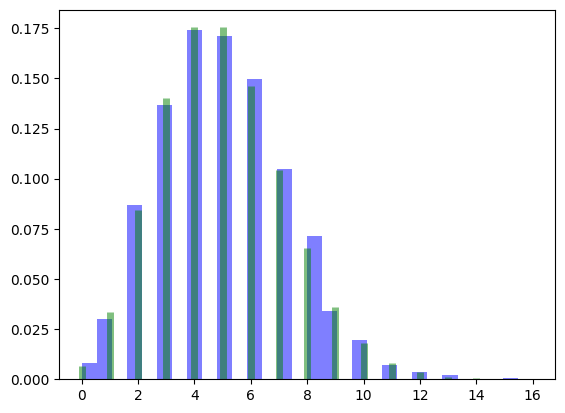

In [44]:
plt.hist(pdata,bins=30,alpha=0.5,label='Lambda=5',color='blue',
         weights=np.ones_like(pdata)/S)
x=np.array(range(0,15,1))
plt.vlines(x, 0, stats.poisson.pmf(x,5),
           colors='green', lw=5, alpha=0.5)


# **Poisson Distribution Fitting to Data**

In [45]:
##Attacks to computing center example
attack_data=np.concatenate((np.repeat(0,9),np.repeat(1,14),np.repeat(2,13),
      np.repeat(3,9),np.repeat(4,4),np.repeat(5,2),np.repeat(6,1)),axis=0)
attack_data


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 4, 4, 4, 4, 5, 5, 6])

In [46]:
#Compute the empirical distribution
emp_prob=np.empty(max(attack_data)+4)

for i in range(0,(max(attack_data)+4)):
  emp_prob[i]=np.sum(attack_data==i)/attack_data.size

print(emp_prob)
print(sum(emp_prob))

[0.17307692 0.26923077 0.25       0.17307692 0.07692308 0.03846154
 0.01923077 0.         0.         0.        ]
1.0


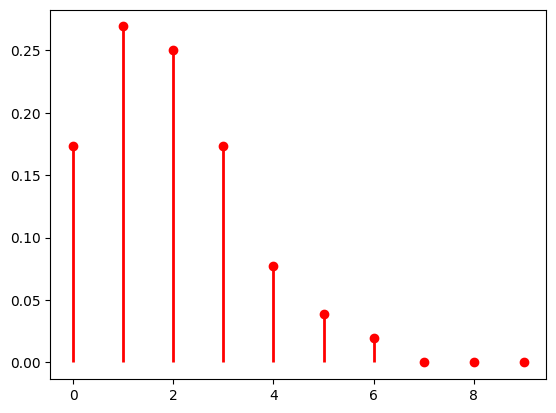

In [47]:
#Visualize the empirical distribution
xk=range(max(attack_data)+4)
fig, ax = plt.subplots(1, 1)
ax.plot(xk, emp_prob, 'ro', ms=6, mec='r')
ax.vlines(xk, 0, emp_prob, colors='r', lw=2)
plt.show()

In [48]:
stats.describe(attack_data)

DescribeResult(nobs=52, minmax=(0, 6), mean=1.9038461538461537, variance=2.1278280542986425, skewness=0.6656308616476064, kurtosis=0.01634276488077724)

In [49]:
pois_prob=stats.poisson.pmf(xk,1.9038)
pois_prob

array([1.49001337e-01, 2.83668745e-01, 2.70024279e-01, 1.71357407e-01,
       8.15575580e-02, 3.10538558e-02, 9.85338844e-03, 2.67984013e-03,
       6.37734955e-04, 1.34902201e-04])

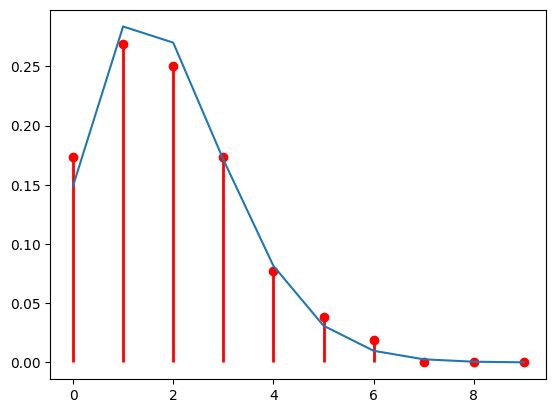

In [50]:
#Show the fitness of Poisson distribution
xk=range(max(attack_data)+4)
fig, ax = plt.subplots(1, 1)
ax.plot(xk, emp_prob, 'ro', ms=6, mec='r')
ax.vlines(xk, 0, emp_prob, colors='r', lw=2)
ax.plot(xk, pois_prob)
plt.show()

In [51]:
#Compute P(Attack>=6)
1-stats.poisson.cdf(5,1.9038)

0.013336817909850418

In [52]:
stats.poisson.ppf(0.99,1.9038)

6.0

# **Negative Binomial Distribution**

In [53]:
np.random.seed(9527)
n=5
p=0.5
simx=stats.nbinom.rvs(n, p, size=1000)

In [54]:
simx[0:10]

array([7, 4, 2, 3, 4, 0, 4, 6, 2, 4])

In [55]:
#Compute the empirical distribution
emp_prob=np.empty(max(simx)+1)

for i in range(0,(max(simx)+1)):
  emp_prob[i]=np.sum(simx==i)/simx.size

print(emp_prob)
print(sum(emp_prob))

[0.032 0.082 0.134 0.127 0.155 0.115 0.09  0.078 0.052 0.041 0.027 0.029
 0.015 0.007 0.008 0.002 0.003 0.002 0.001]
1.0


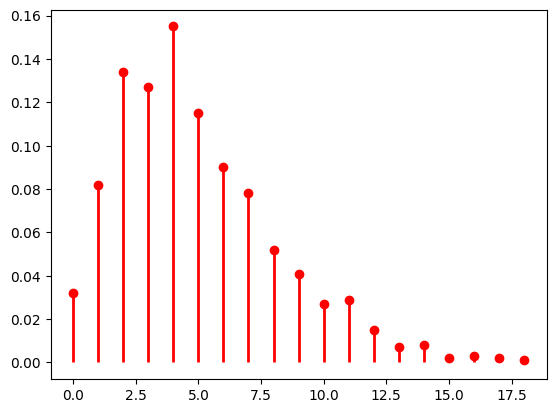

In [56]:
#Visualize the empirical distribution
xk=range(max(simx)+1)
fig, ax = plt.subplots(1, 1)
ax.plot(xk, emp_prob, 'ro', ms=6, mec='r')
ax.vlines(xk, 0, emp_prob, colors='r', lw=2)
plt.show()

In [57]:
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.nbinom.html
##https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.nbinom.html

stats.describe(simx)

DescribeResult(nobs=1000, minmax=(0, 18), mean=4.899, variance=10.076875875875876, skewness=0.9268040551898865, kurtosis=0.8189300997370723)

In [58]:
phat=4.899/10.0769
nhat=np.square(4.899)/(10.0769-4.899)

print([nhat, phat])

[4.635122540025879, 0.4861614186902718]


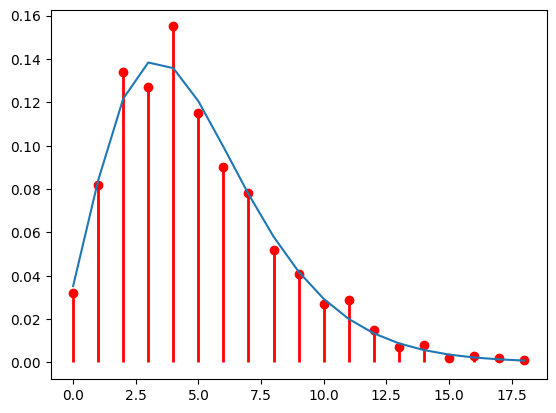

In [59]:
xk=range(max(simx)+1)
fig, ax = plt.subplots(1, 1)
ax.plot(xk, emp_prob, 'ro', ms=6, mec='r')
ax.vlines(xk, 0, emp_prob, colors='r', lw=2)
ax.plot(xk, stats.nbinom.pmf(xk,n=4.635,p=0.486))
plt.show()